In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine, text
from dotenv import load_dotenv
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

Celda 2: Establecer conexión a la base de datos y cargar datos en DataFrame


In [3]:
logging.info("Cargando variables de entorno para la conexión a la base de datos...")
dotenv_path = '/home/nicolas/Escritorio/workshops/workshop_2/env/.env'
load_dotenv(dotenv_path=dotenv_path)

DB_USER = os.getenv('POSTGRES_USER')
DB_PASSWORD = os.getenv('POSTGRES_PASSWORD')
DB_HOST = os.getenv('POSTGRES_HOST')
DB_PORT = os.getenv('POSTGRES_PORT')
DB_NAME = os.getenv('POSTGRES_DB')
TABLE_NAME = 'the_grammy_awards'

logging.info(f"Conectando a la base de datos: {DB_NAME} en {DB_HOST}:{DB_PORT}")

df = None 
engine = None

if not all([DB_USER, DB_PASSWORD, DB_HOST, DB_PORT, DB_NAME]):
    logging.error("Faltan variables de entorno para la base de datos en " + dotenv_path)
else:
    try:
        db_url = f'postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
        engine = create_engine(db_url)

        logging.info(f"Leyendo datos desde la tabla '{TABLE_NAME}'...")
        query = f"SELECT * FROM {TABLE_NAME}"

        df = pd.read_sql_query(query, con=engine)
        logging.info(f"Datos cargados exitosamente desde la tabla '{TABLE_NAME}' en un DataFrame.")

    except Exception as e:
        logging.error(f"Error al conectar a la base de datos o leer la tabla '{TABLE_NAME}': {e}")
        raise

2025-04-11 12:29:52,003 - INFO - Cargando variables de entorno para la conexión a la base de datos...
2025-04-11 12:29:52,007 - INFO - Conectando a la base de datos: artists en localhost:5432
2025-04-11 12:29:52,033 - INFO - Leyendo datos desde la tabla 'the_grammy_awards'...
2025-04-11 12:29:52,068 - INFO - Datos cargados exitosamente desde la tabla 'the_grammy_awards' en un DataFrame.


Celda 3: Vista rápida de la estructura y contenido del DataFrame


In [4]:
if df is not None:
    logging.info("--- 4. Vista rápida de la tabla (primeras filas) ---")
    display(df.head())

    logging.info("\n--- Información general del DataFrame ---")
    display(df.info())
else:
    logging.warning("El DataFrame no se cargó debido a un error previo. Saltando el resto del análisis.")

2025-04-11 12:29:52,076 - INFO - --- 4. Vista rápida de la tabla (primeras filas) ---


,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


2025-04-11 12:29:52,094 - INFO - 
--- Información general del DataFrame ---


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


None

Celda 4: Mostrar tipos de datos por columna


In [5]:
if df is not None:
    logging.info("\n--- 5. Tipos de datos por columna (dtypes) ---")
    display(df.dtypes)

2025-04-11 12:29:52,112 - INFO - 
--- 5. Tipos de datos por columna (dtypes) ---


year             int64
title           object
published_at    object
updated_at      object
category        object
nominee         object
artist          object
workers         object
img             object
winner            bool
dtype: object

Celda 5: Ver cantidad total de filas y columnas


In [6]:
if df is not None:
    logging.info("\n--- 6. Dimensiones del DataFrame (filas, columnas) ---")
    num_filas, num_columnas = df.shape
    print(f"Número total de filas: {num_filas}")
    print(f"Número total de columnas: {num_columnas}")

2025-04-11 12:29:52,124 - INFO - 
--- 6. Dimensiones del DataFrame (filas, columnas) ---


Número total de filas: 4810
Número total de columnas: 10


Celda 6: Ver número de filas duplicadas


In [7]:
if df is not None:
    logging.info("\n--- 7. Conteo de filas duplicadas ---")
    num_duplicados = df.duplicated().sum()
    print(f"Número de filas duplicadas: {num_duplicados}")

2025-04-11 12:29:52,134 - INFO - 
--- 7. Conteo de filas duplicadas ---


Número de filas duplicadas: 0


Celda 7: Ver número total de valores nulos


In [8]:
if df is not None:
    logging.info("\n--- 8.a. Conteo total de valores nulos ---")
    total_nulos = df.isnull().sum().sum()
    print(f"Número total de valores nulos en todo el DataFrame: {total_nulos}")

2025-04-11 12:29:52,149 - INFO - 
--- 8.a. Conteo total de valores nulos ---


Número total de valores nulos en todo el DataFrame: 5403


Celda 8: Ver valores nulos por columna


In [9]:
if df is not None:
    logging.info("\n--- 8.b. Conteo de valores nulos por columna ---")
    nulos_por_columna = df.isnull().sum()
    nulos_presentes = nulos_por_columna[nulos_por_columna > 0].sort_values(ascending=False)
    if not nulos_presentes.empty:
        print("Columnas con valores nulos y su conteo:")
        display(nulos_presentes)
    else:
        print("No se encontraron valores nulos en ninguna columna.")

2025-04-11 12:29:52,164 - INFO - 
--- 8.b. Conteo de valores nulos por columna ---


Columnas con valores nulos y su conteo:


workers    2190
artist     1840
img        1367
nominee       6
dtype: int64

Celda 9: Estadísticas descriptivas


In [10]:
if df is not None:
    logging.info("\n--- 9. Estadísticas Descriptivas para 'year' ---")
    display(df.describe())

2025-04-11 12:29:52,179 - INFO - 
--- 9. Estadísticas Descriptivas para 'year' ---


,year
count,4810.000000
mean,1995.566944
std,17.149720
min,1958.000000
25%,1983.000000
50%,1998.000000
75%,2010.000000
max,2019.000000


Celda 5: Conteo de Valores para Categorías Principales


In [11]:
if df is not None:
    logging.info("\n--- 11. Conteo de Valores para Columnas Categóricas Clave ---")

    # Columnas categóricas de interés (ajusta según necesidad)
    cols_para_value_counts = ['category', 'winner', 'title', 'artist', 'nominee']
    N_TOP_VALUES = 20 # Cuántos valores mostrar para columnas con muchos únicos

    for col in cols_para_value_counts:
        if col in df.columns:
            print(f"\n--- Conteo de valores para '{col}' ---")
            try:
                counts = df[col].value_counts(dropna=False) # Incluir NaN en el conteo
                total_unique = len(counts)
                print(f"Total de categorías únicas (incluyendo NaN si existe): {total_unique}")

                if total_unique > N_TOP_VALUES:
                    print(f"Mostrando los {N_TOP_VALUES} valores más frecuentes:")
                    display(counts.head(N_TOP_VALUES))
                else:
                    print("Frecuencia de cada valor:")
                    display(counts)

            except Exception as e:
                print(f"No se pudo calcular value_counts para '{col}': {e}")
            print("-" * 40)
        else:
            logging.warning(f"La columna '{col}' no se encontró en el DataFrame.")
else:
    logging.warning("El DataFrame 'df' no está disponible.")

2025-04-11 12:29:52,199 - INFO - 
--- 11. Conteo de Valores para Columnas Categóricas Clave ---



--- Conteo de valores para 'category' ---
Total de categorías únicas (incluyendo NaN si existe): 638
Mostrando los 20 valores más frecuentes:


category
Song Of The Year                     70
Record Of The Year                   69
Album Of The Year                    66
Best Opera Recording                 64
Best Album Notes                     63
                                     ..
Best Pop Instrumental Performance    34
Best Rock Song                       33
Best New Age Album                   33
Best Reggae Album                    33
Best Recording Package               32
Name: count, Length: 20, dtype: int64

----------------------------------------

--- Conteo de valores para 'winner' ---
Total de categorías únicas (incluyendo NaN si existe): 1
Frecuencia de cada valor:


winner
True    4810
Name: count, dtype: int64

----------------------------------------

--- Conteo de valores para 'title' ---
Total de categorías únicas (incluyendo NaN si existe): 62
Mostrando los 20 valores más frecuentes:


title
62nd Annual GRAMMY Awards  (2019)    433
50th Annual GRAMMY Awards  (2007)    111
51st Annual GRAMMY Awards  (2008)    111
49th Annual GRAMMY Awards  (2006)    110
52nd Annual GRAMMY Awards  (2009)    109
                                    ... 
39th Annual GRAMMY Awards  (1996)     89
38th Annual GRAMMY Awards  (1995)     88
37th Annual GRAMMY Awards  (1994)     88
61st Annual GRAMMY Awards  (2018)     86
60th Annual GRAMMY Awards  (2017)     86
Name: count, Length: 20, dtype: int64

----------------------------------------

--- Conteo de valores para 'artist' ---
Total de categorías únicas (incluyendo NaN si existe): 1659
Mostrando los 20 valores más frecuentes:


artist
None                 1840
(Various Artists)      66
U2                     18
Aretha Franklin        16
Stevie Wonder          13
                     ... 
Foo Fighters           10
Eric Clapton           10
Vince Gill             10
Pat Metheny Group      10
Shirley Caesar          9
Name: count, Length: 20, dtype: int64

----------------------------------------

--- Conteo de valores para 'nominee' ---
Total de categorías únicas (incluyendo NaN si existe): 4132
Mostrando los 20 valores más frecuentes:


nominee
Bridge Over Troubled Water        7
Steven Epstein                    7
Berlioz: Requiem                  7
Robert Woods                      7
Britten: War Requiem              6
                                 ..
West Side Story                   5
King Of The Road                  5
Berg: Wozzeck                     5
This Is America                   4
Bartók: Concerto For Orchestra    4
Name: count, Length: 20, dtype: int64

----------------------------------------


In [12]:
# Configuración de estilo para los gráficos (opcional)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 4) # Tamaño por defecto para gráficos individuales

2025-04-11 12:29:52,245 - INFO - 
--- Gráfica 1: Distribución de Años ---


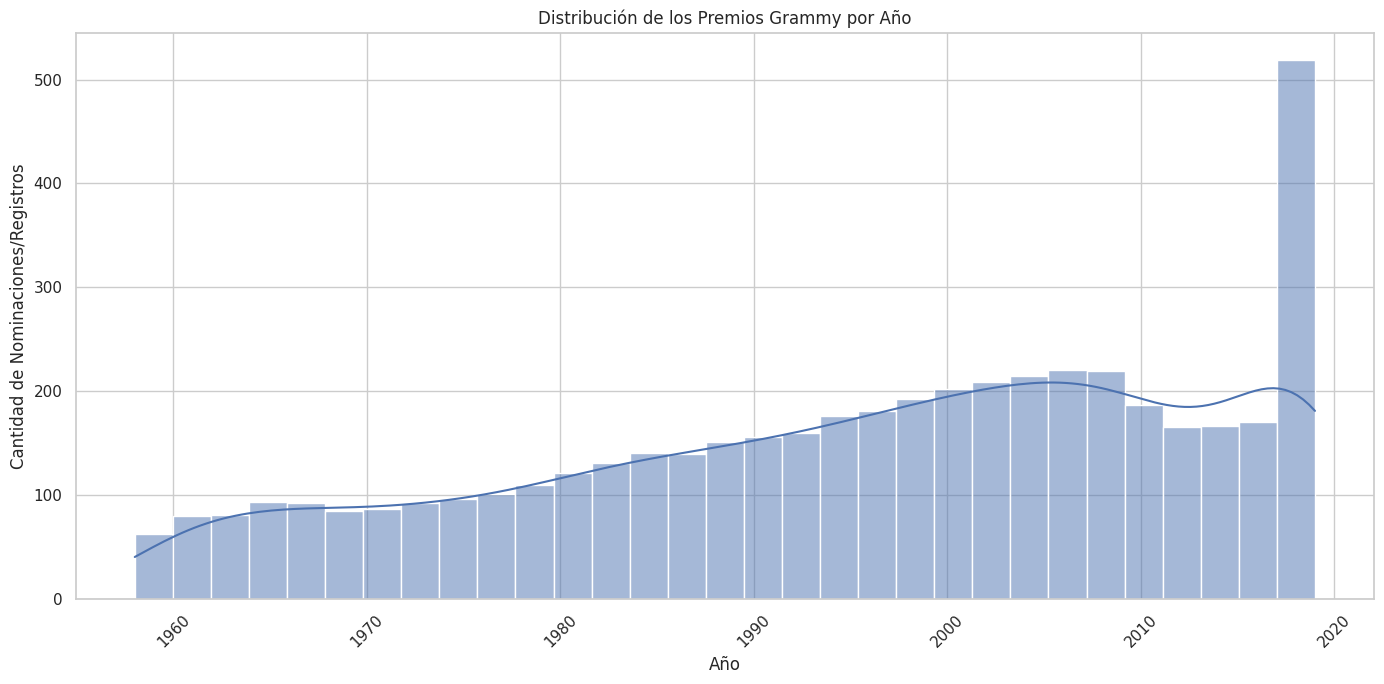

In [13]:
# Gráfica 1: Distribución de los Años de los Premios (Histograma)
if df is not None:
    logging.info("\n--- Gráfica 1: Distribución de Años ---")
    plt.figure(figsize=(14, 7))
    sns.histplot(data=df, x='year', bins=len(df['year'].unique())//2, kde=True) # Ajustar bins si es necesario
    plt.title('Distribución de los Premios Grammy por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Nominaciones/Registros')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    logging.warning("DataFrame no disponible para Gráfica 1.")

2025-04-11 12:29:52,602 - INFO - 
--- Gráfica 2: Conteo de Columna 'winner' ---


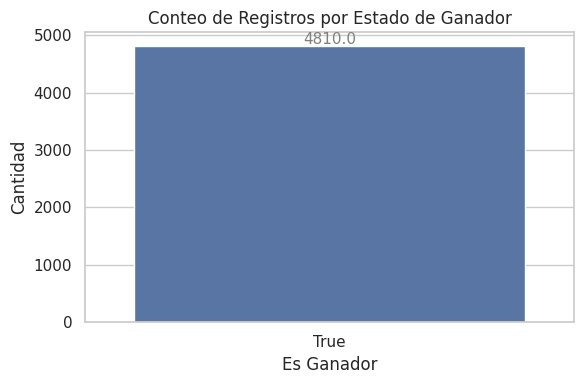

NOTA: Como se observó, todos los registros tienen 'winner' = True.


In [14]:
# Gráfica 2: Conteo de Ganadores (Aunque sabemos que todos son True)
if df is not None:
    logging.info("\n--- Gráfica 2: Conteo de Columna 'winner' ---")
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x='winner')
    plt.title('Conteo de Registros por Estado de Ganador')
    plt.xlabel('Es Ganador')
    plt.ylabel('Cantidad')
    # Añadir anotaciones con el conteo
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()
    print("NOTA: Como se observó, todos los registros tienen 'winner' = True.")
else:
    logging.warning("DataFrame no disponible para Gráfica 2.")

2025-04-11 12:29:52,753 - INFO - 
--- Gráfica 3: Top 15 Categorías Más Frecuentes ---
/tmp/ipykernel_18344/369970225.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_categories, y='category', x='count', palette='viridis', orient='h')


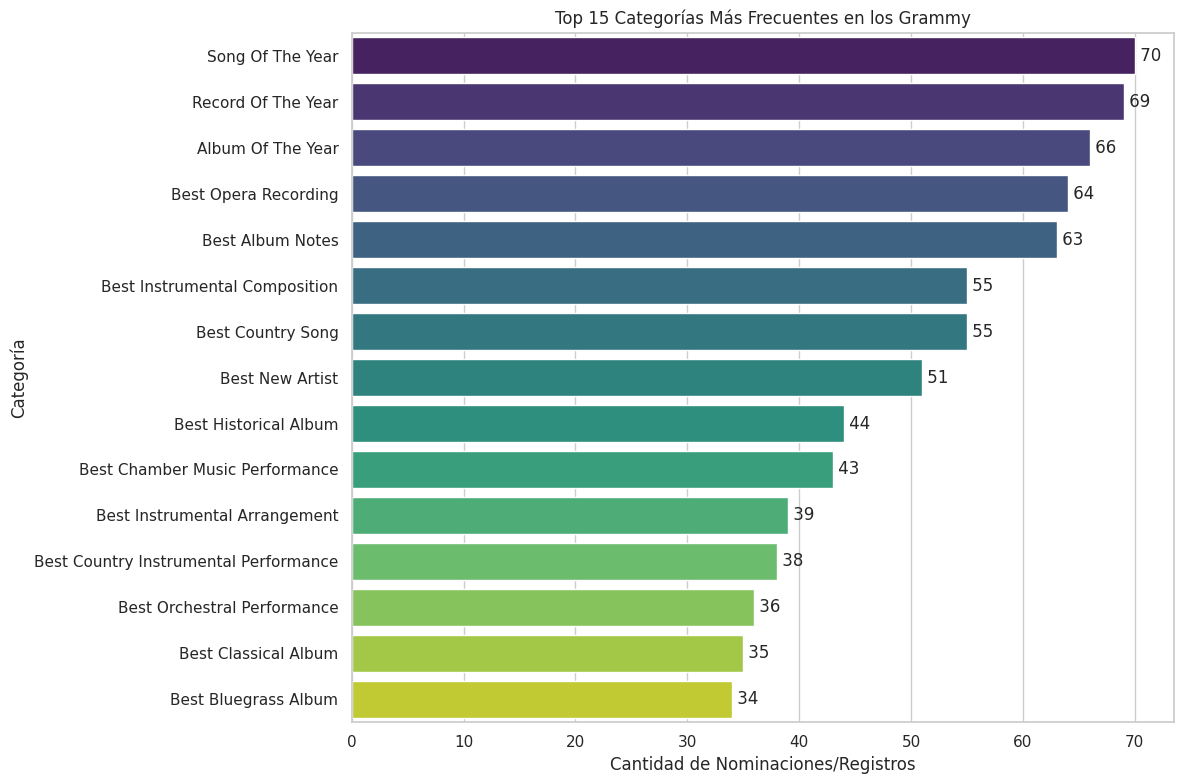

In [15]:
# Gráfica 3: Top N Categorías Más Frecuentes
if df is not None:
    logging.info("\n--- Gráfica 3: Top 15 Categorías Más Frecuentes ---")
    n_top_categories = 15
    top_categories = df['category'].value_counts().nlargest(n_top_categories).reset_index()
    top_categories.columns = ['category', 'count']

    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(data=top_categories, y='category', x='count', palette='viridis', orient='h')
    plt.title(f'Top {n_top_categories} Categorías Más Frecuentes en los Grammy')
    plt.xlabel('Cantidad de Nominaciones/Registros')
    plt.ylabel('Categoría')
    # Añadir conteos en las barras
    for index, value in enumerate(top_categories['count']):
        plt.text(value, index, f' {value}', va='center')
    plt.tight_layout()
    plt.show()
else:
    logging.warning("DataFrame no disponible para Gráfica 3.")

2025-04-11 12:29:53,150 - INFO - 
--- Gráfica 4: Top 15 Artistas Más Frecuentes (excluyendo nulos) ---
/tmp/ipykernel_18344/3001309692.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_artists, y='artist', x='count', palette='magma', orient='h')


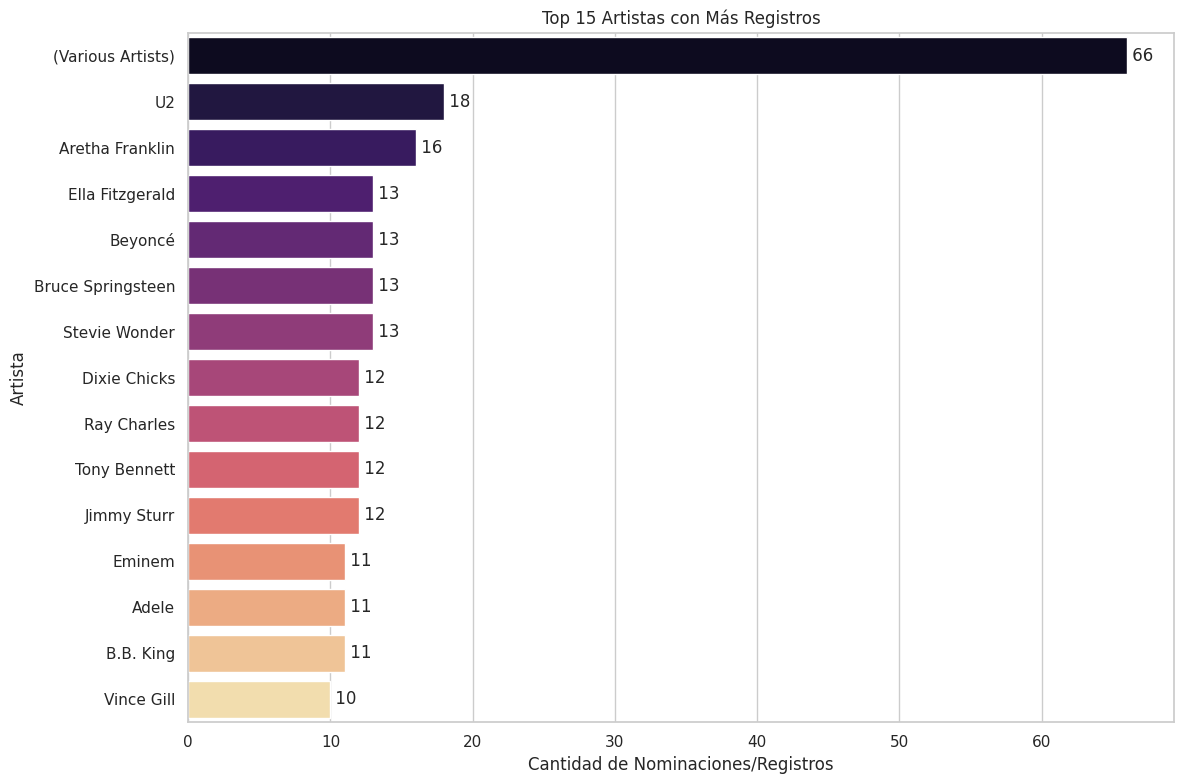

In [16]:
# Gráfica 4: Top N Artistas con Más Registros (Nominaciones/Premios en el dataset)
if df is not None:
    logging.info("\n--- Gráfica 4: Top 15 Artistas Más Frecuentes (excluyendo nulos) ---")
    n_top_artists = 15
    # Usamos dropna() aquí porque los nulos no son informativos para este top
    top_artists = df['artist'].dropna().value_counts().nlargest(n_top_artists).reset_index()
    top_artists.columns = ['artist', 'count']

    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_artists, y='artist', x='count', palette='magma', orient='h')
    plt.title(f'Top {n_top_artists} Artistas con Más Registros')
    plt.xlabel('Cantidad de Nominaciones/Registros')
    plt.ylabel('Artista')
    for index, value in enumerate(top_artists['count']):
        plt.text(value, index, f' {value}', va='center')
    plt.tight_layout()
    plt.show()
else:
    logging.warning("DataFrame no disponible para Gráfica 4.")

2025-04-11 12:29:53,569 - INFO - 
--- Gráfica 5: Top 15 Nominados Más Frecuentes (excluyendo nulos) ---
/tmp/ipykernel_18344/1950223057.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_nominees, y='nominee', x='count', palette='coolwarm', orient='h')


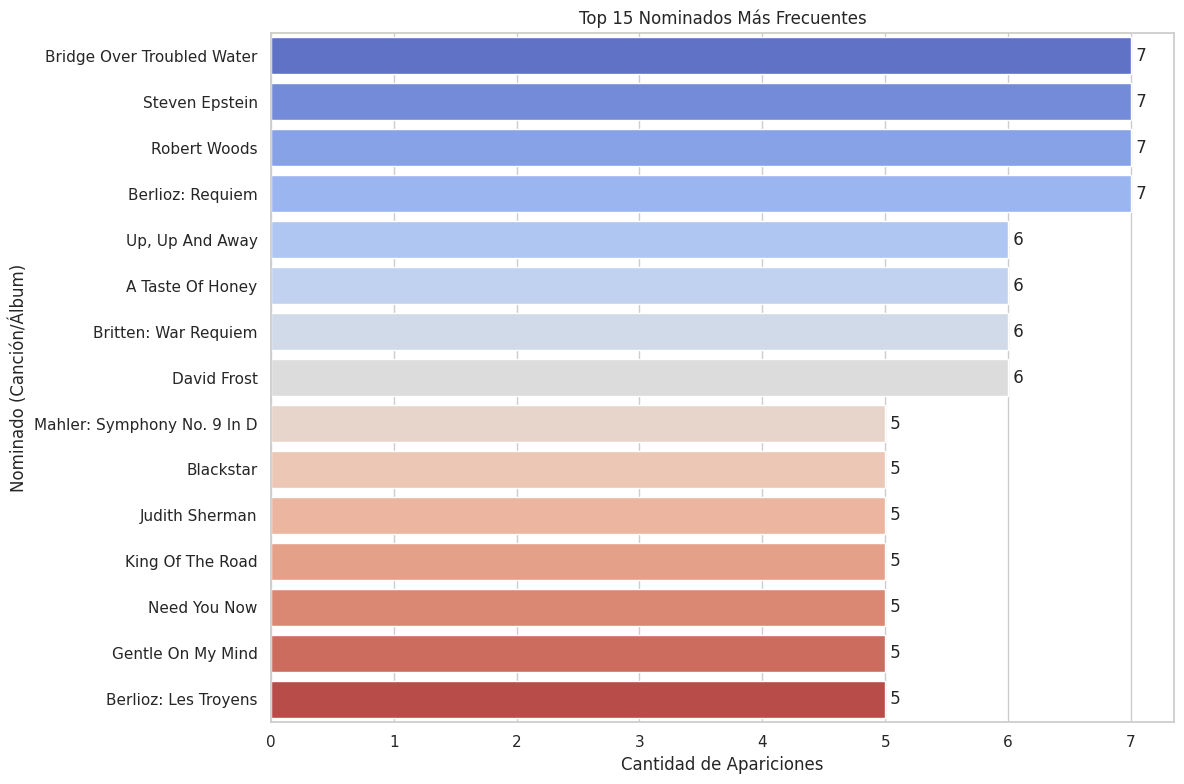

In [17]:
# Gráfica 5: Top N Nominados (Canciones/Álbumes) Más Frecuentes
if df is not None:
    logging.info("\n--- Gráfica 5: Top 15 Nominados Más Frecuentes (excluyendo nulos) ---")
    n_top_nominees = 15
    top_nominees = df['nominee'].dropna().value_counts().nlargest(n_top_nominees).reset_index()
    top_nominees.columns = ['nominee', 'count']

    plt.figure(figsize=(12, 8))
    sns.barplot(data=top_nominees, y='nominee', x='count', palette='coolwarm', orient='h')
    plt.title(f'Top {n_top_nominees} Nominados Más Frecuentes')
    plt.xlabel('Cantidad de Apariciones')
    plt.ylabel('Nominado (Canción/Álbum)')
    for index, value in enumerate(top_nominees['count']):
        plt.text(value, index, f' {value}', va='center')
    plt.tight_layout()
    plt.show()
else:
    logging.warning("DataFrame no disponible para Gráfica 5.")

2025-04-11 12:29:53,963 - INFO - 
--- Gráfica 6: Número de Registros por Año ---


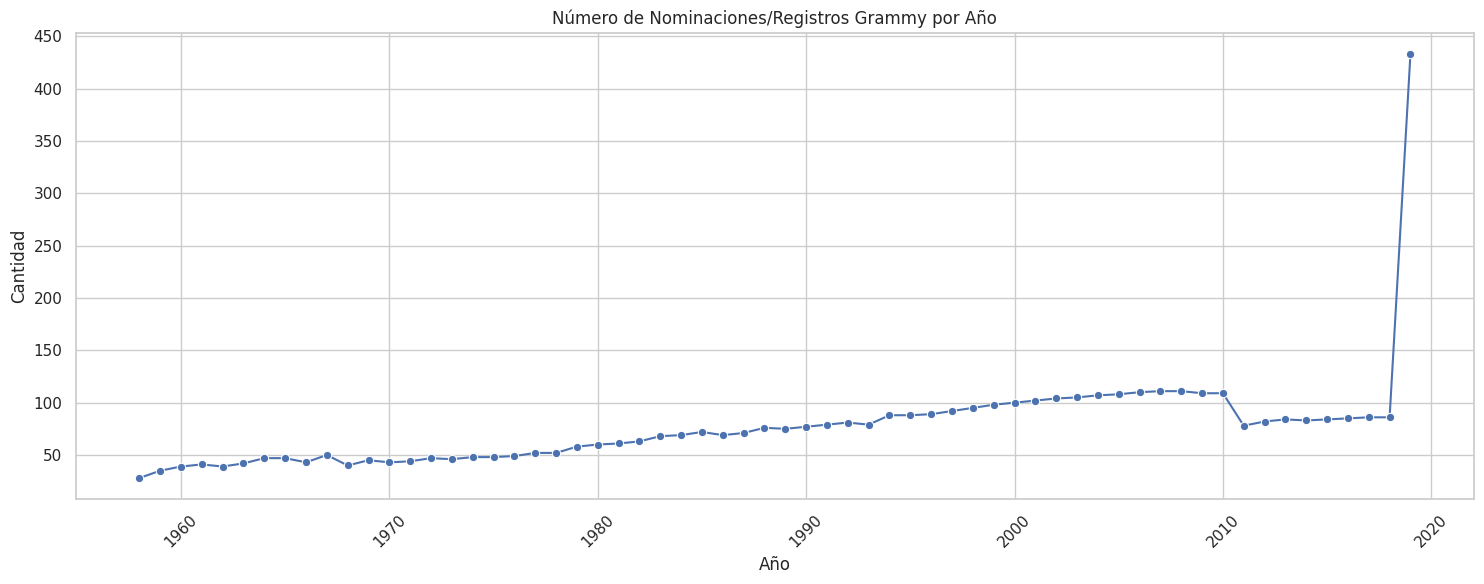

In [18]:
# Gráfica 6: Número de Registros (Nominaciones/Premios) por Año (Line Plot)
if df is not None:
    logging.info("\n--- Gráfica 6: Número de Registros por Año ---")
    awards_per_year = df.groupby('year').size().reset_index(name='count')

    plt.figure(figsize=(15, 6))
    sns.lineplot(data=awards_per_year, x='year', y='count', marker='o')
    plt.title('Número de Nominaciones/Registros Grammy por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    logging.warning("DataFrame no disponible para Gráfica 6.")

2025-04-11 12:29:54,196 - INFO - 
--- Gráfica 7: Conteo por Fecha de Publicación ---
2025-04-11 12:29:54,215 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_18344/2058941259.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='published_at', order=df['published_at'].value_counts().index, palette='crest')
2025-04-11 12:29:54,225 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


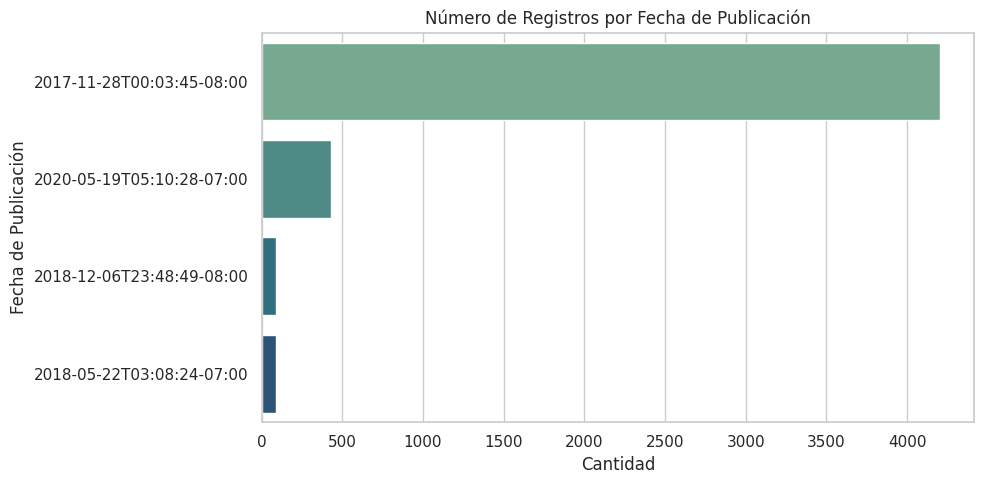

In [19]:
# Gráfica 7: Conteo de registros por fecha de publicación (si hay pocos únicos)
if df is not None and df['published_at'].nunique() < 20: # Solo graficar si no hay demasiadas fechas únicas
    logging.info("\n--- Gráfica 7: Conteo por Fecha de Publicación ---")
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, y='published_at', order=df['published_at'].value_counts().index, palette='crest')
    plt.title('Número de Registros por Fecha de Publicación')
    plt.xlabel('Cantidad')
    plt.ylabel('Fecha de Publicación')
    plt.tight_layout()
    plt.show()
elif df is not None:
     logging.info("Gráfica 7 omitida: Demasiadas fechas de publicación únicas para un countplot claro.")
else:
    logging.warning("DataFrame no disponible para Gráfica 7.")

2025-04-11 12:29:54,507 - INFO - 
--- Gráfica 8: Conteo por Fecha de Actualización ---
2025-04-11 12:29:54,527 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_18344/470096796.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='updated_at', order=df['updated_at'].value_counts().index, palette='flare')
2025-04-11 12:29:54,537 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


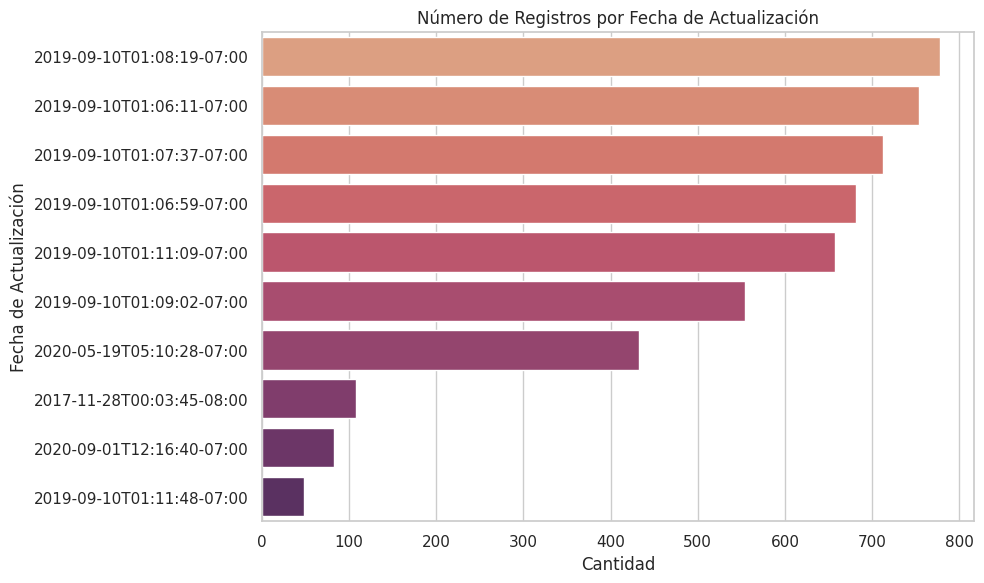

In [20]:
# Gráfica 8: Conteo de registros por fecha de actualización (si hay pocos únicos)
if df is not None and df['updated_at'].nunique() < 20: # Solo graficar si no hay demasiadas fechas únicas
    logging.info("\n--- Gráfica 8: Conteo por Fecha de Actualización ---")
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y='updated_at', order=df['updated_at'].value_counts().index, palette='flare')
    plt.title('Número de Registros por Fecha de Actualización')
    plt.xlabel('Cantidad')
    plt.ylabel('Fecha de Actualización')
    plt.tight_layout()
    plt.show()
elif df is not None:
     logging.info("Gráfica 8 omitida: Demasiadas fechas de actualización únicas para un countplot claro.")
else:
    logging.warning("DataFrame no disponible para Gráfica 8.")

2025-04-11 12:29:54,794 - INFO - 
--- Gráfica 9: Número de Categorías Únicas por Año ---


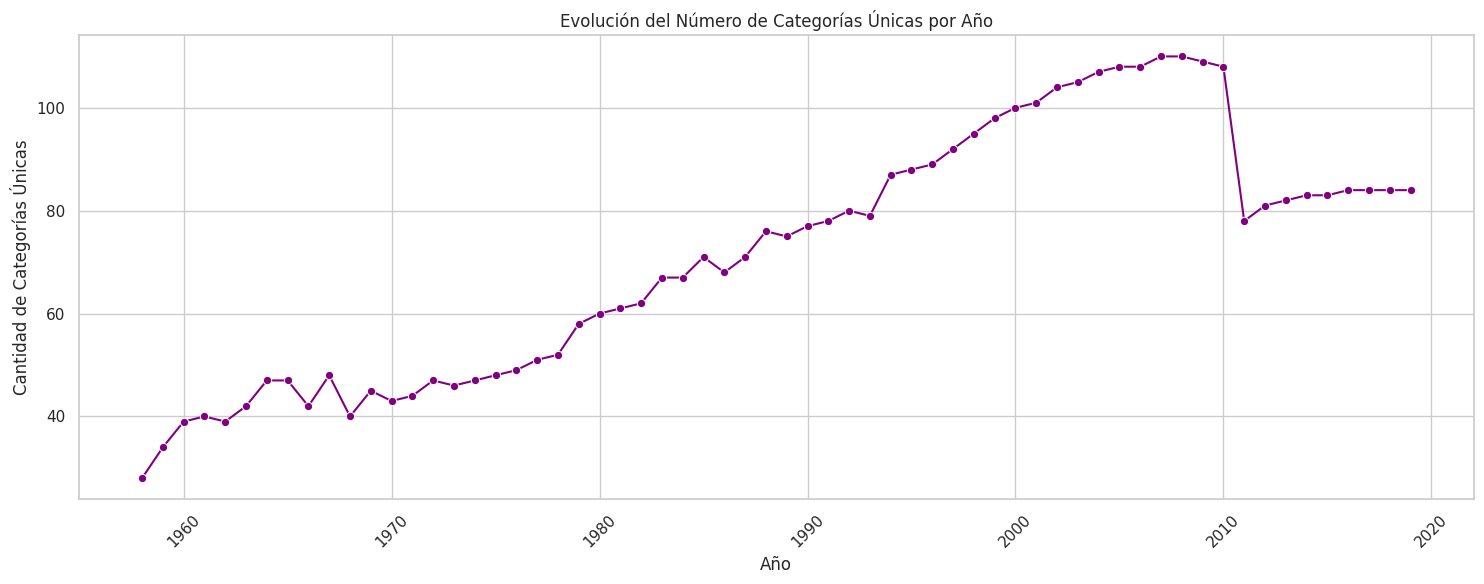

In [21]:
# Gráfica 9: Número de categorías únicas por año
if df is not None:
    logging.info("\n--- Gráfica 9: Número de Categorías Únicas por Año ---")
    categories_per_year = df.groupby('year')['category'].nunique().reset_index(name='unique_categories')

    plt.figure(figsize=(15, 6))
    sns.lineplot(data=categories_per_year, x='year', y='unique_categories', marker='o', color='purple')
    plt.title('Evolución del Número de Categorías Únicas por Año')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Categorías Únicas')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    logging.warning("DataFrame no disponible para Gráfica 9.")

2025-04-11 12:29:55,021 - INFO - 
--- Gráfica 11: Proporción de Valores Nulos por Columna ---
/tmp/ipykernel_18344/3266913882.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_percentage.index, y=null_percentage.values, palette='rocket')


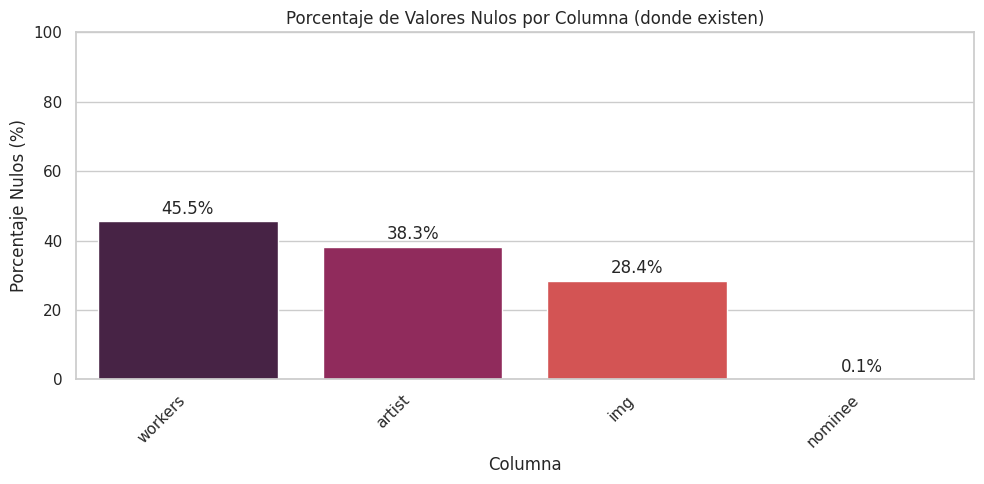

In [22]:
# Gráfica 10: Proporción de Nulos por Columna (Bar Plot)
if df is not None:
    logging.info("\n--- Gráfica 11: Proporción de Valores Nulos por Columna ---")
    null_percentage = (df.isnull().sum() / len(df)) * 100
    null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False) # Filtrar y ordenar

    if not null_percentage.empty:
        plt.figure(figsize=(10, 5))
        sns.barplot(x=null_percentage.index, y=null_percentage.values, palette='rocket')
        plt.title('Porcentaje de Valores Nulos por Columna (donde existen)')
        plt.xlabel('Columna')
        plt.ylabel('Porcentaje Nulos (%)')
        plt.xticks(rotation=45, ha='right')
        plt.ylim(0, 100) # Asegurar que el eje Y va hasta 100%
        # Añadir etiquetas de porcentaje
        ax = plt.gca()
        for i, p in enumerate(ax.patches):
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + 1,
                    f'{null_percentage.values[i]:.1f}%', ha='center', va='bottom')
        plt.tight_layout()
        plt.show()
    else:
        print("No hay columnas con valores nulos para graficar.")
else:
    logging.warning("DataFrame no disponible para Gráfica 11.")

2025-04-11 12:29:55,222 - INFO - 
--- Matriz de Gráficas (2x3) - EDA Resumen ---


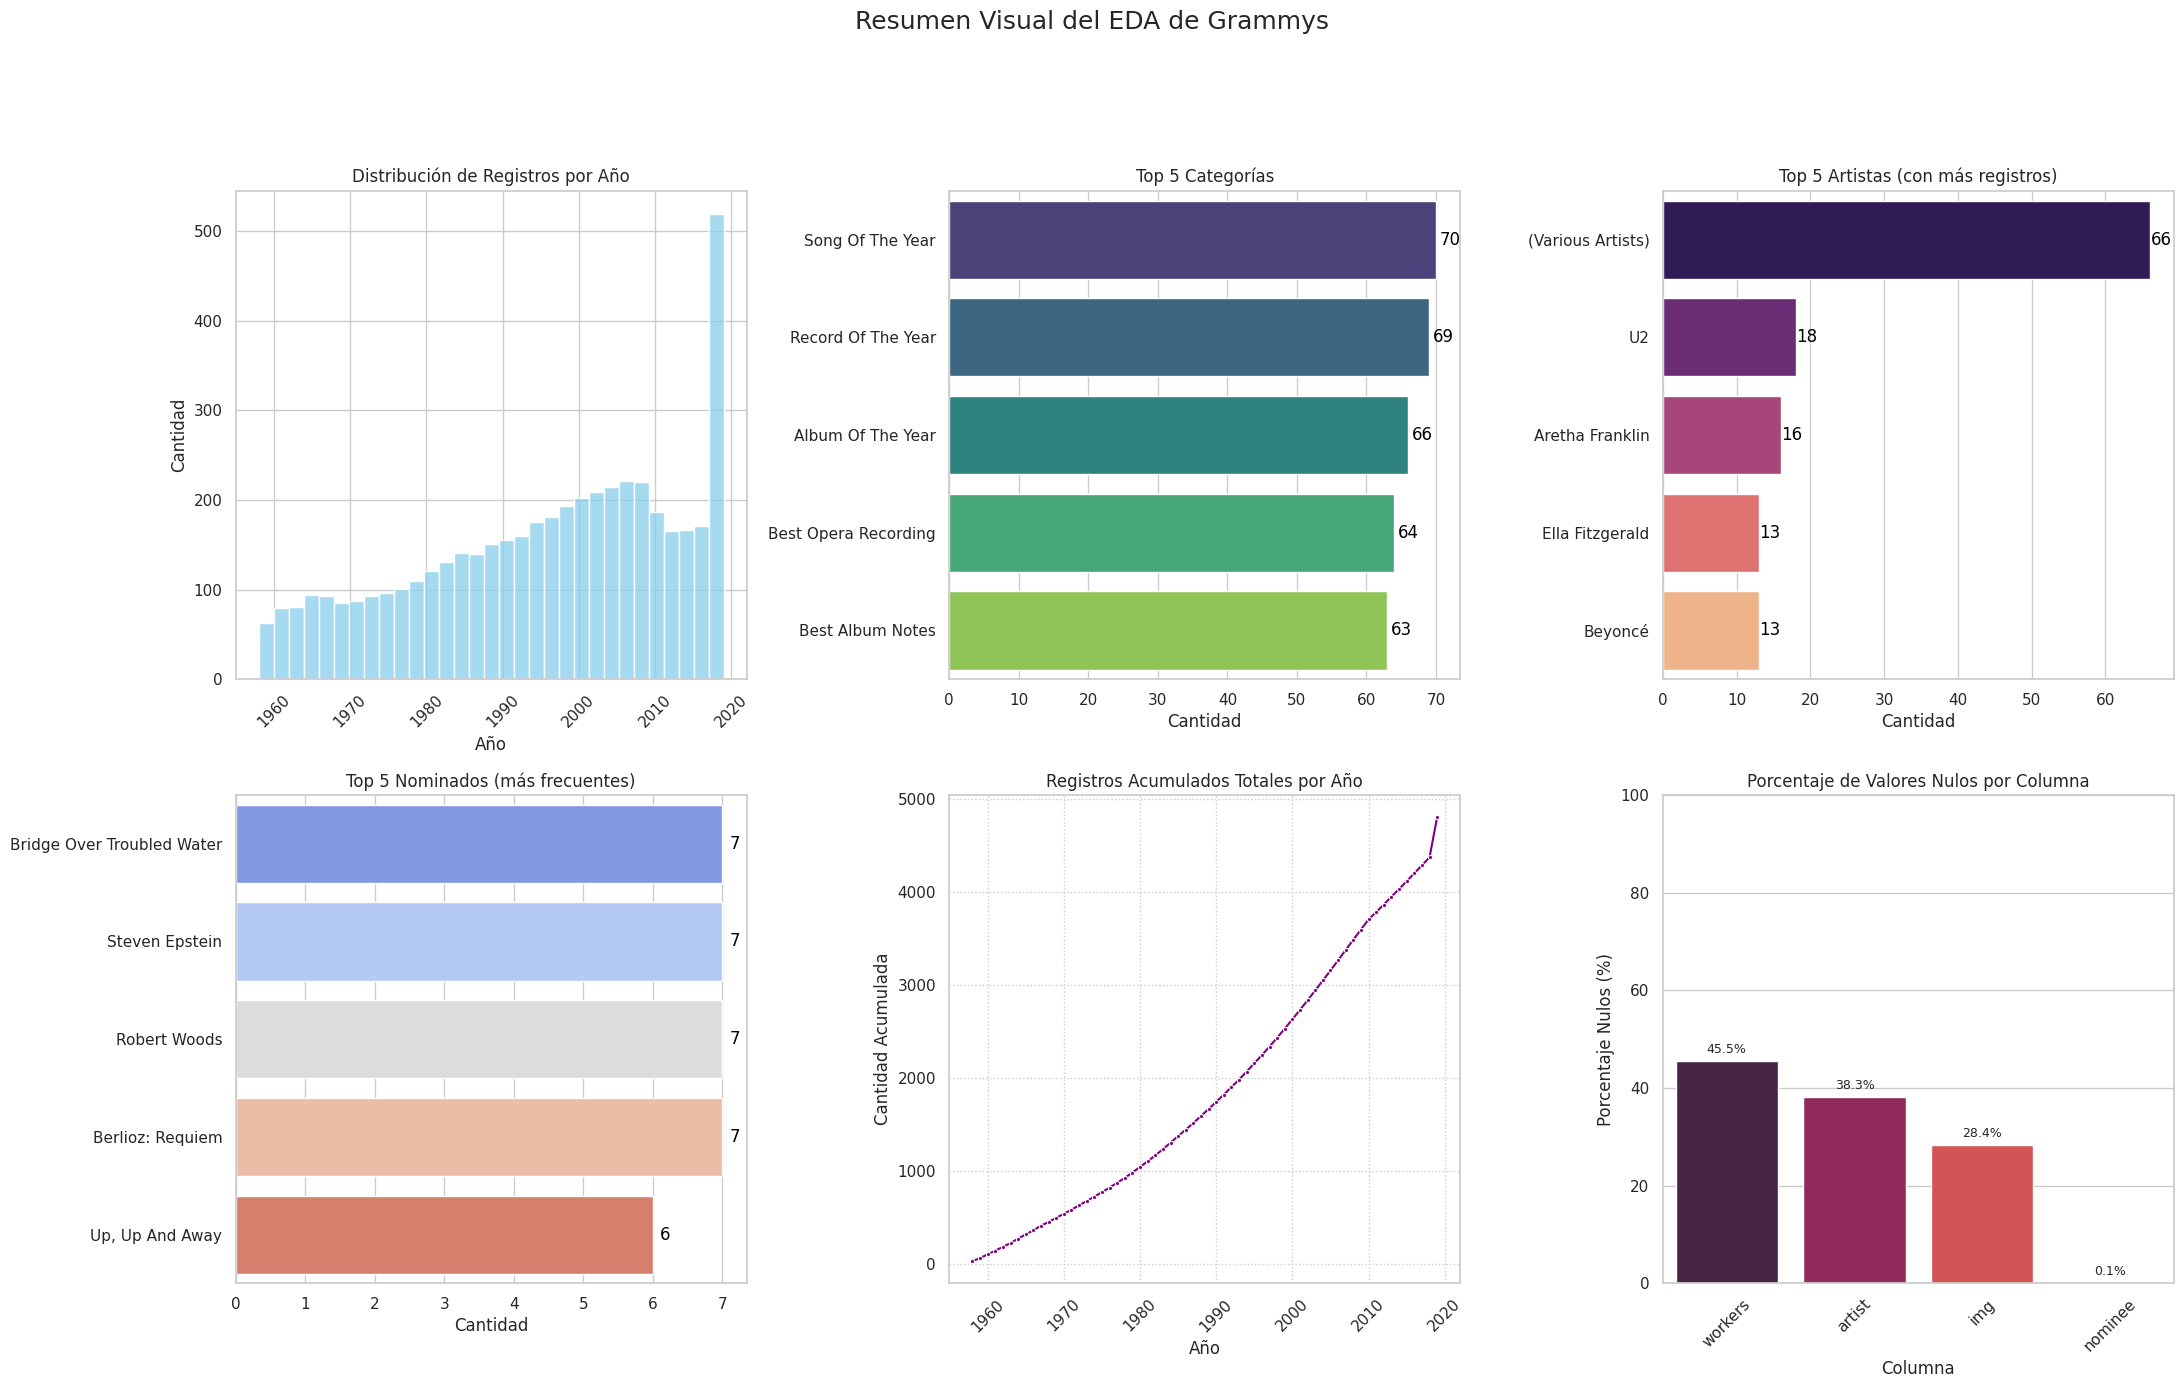

2025-04-11 12:29:56,479 - INFO - 
--- Fin de la Matriz de Visualizaciones EDA ---


In [23]:
# --- Matriz de Gráficas (Ejemplo de 6 gráficos - Versión Modificada) ---
if df is not None:
    logging.info("\n--- Matriz de Gráficas (2x3) - EDA Resumen ---")
    fig, axes = plt.subplots(2, 3, figsize=(22, 14)) # Ajustar tamaño si es necesario
    fig.suptitle('Resumen Visual del EDA de Grammys', fontsize=18, y=1.02) # Título general

    # --- Fila 1 ---

    # 1. Histograma de Año
    sns.histplot(data=df, x='year', bins=len(df['year'].unique())//2, kde=False, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Distribución de Registros por Año')
    axes[0, 0].set_xlabel('Año')
    axes[0, 0].set_ylabel('Cantidad')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # 2. Top 5 Categorías (Añadir hue y legend=False)
    n_top_cat_matrix = 5
    top_cat_matrix = df['category'].value_counts().nlargest(n_top_cat_matrix).reset_index()
    top_cat_matrix.columns = ['category', 'count']
    # --- Modificación aquí ---
    sns.barplot(data=top_cat_matrix, y='category', x='count', ax=axes[0, 1], palette='viridis', orient='h',
                hue='category', legend=False)
    # ----------------------
    axes[0, 1].set_title(f'Top {n_top_cat_matrix} Categorías')
    axes[0, 1].set_xlabel('Cantidad')
    axes[0, 1].set_ylabel('')
    for i, v in enumerate(top_cat_matrix['count']):
        axes[0, 1].text(v + 0.5, i, str(v), color='black', va='center')

    # 3. Top 5 Artistas (Añadir hue y legend=False)
    n_top_art_matrix = 5
    top_art_matrix = df['artist'].dropna().value_counts().nlargest(n_top_art_matrix).reset_index()
    top_art_matrix.columns = ['artist', 'count']
    # --- Modificación aquí ---
    sns.barplot(data=top_art_matrix, y='artist', x='count', ax=axes[0, 2], palette='magma', orient='h',
                hue='artist', legend=False)
    # ----------------------
    axes[0, 2].set_title(f'Top {n_top_art_matrix} Artistas (con más registros)')
    axes[0, 2].set_xlabel('Cantidad')
    axes[0, 2].set_ylabel('')
    for i, v in enumerate(top_art_matrix['count']):
        axes[0, 2].text(v + 0.1, i, str(v), color='black', va='center')

    # --- Fila 2 ---

    # 4. Top 5 Nominados (Añadir hue y legend=False)
    n_top_nom_matrix = 5
    top_nom_matrix = df['nominee'].dropna().value_counts().nlargest(n_top_nom_matrix).reset_index()
    top_nom_matrix.columns = ['nominee', 'count']
    # --- Modificación aquí ---
    sns.barplot(data=top_nom_matrix, y='nominee', x='count', ax=axes[1, 0], palette='coolwarm', orient='h',
                hue='nominee', legend=False)
    # ----------------------
    axes[1, 0].set_title(f'Top {n_top_nom_matrix} Nominados (más frecuentes)')
    axes[1, 0].set_xlabel('Cantidad')
    axes[1, 0].set_ylabel('')
    for i, v in enumerate(top_nom_matrix['count']):
        axes[1, 0].text(v + 0.1, i, str(v), color='black', va='center')

    # --- 5. Gráfico de Suma Acumulada de Registros por Año ---
    # Calcular conteo por año y luego la suma acumulada
    awards_per_year_matrix = df.groupby('year').size().reset_index(name='count')
    awards_per_year_matrix['cumulative_count'] = awards_per_year_matrix['count'].cumsum()

    sns.lineplot(data=awards_per_year_matrix, x='year', y='cumulative_count', marker='.', ax=axes[1, 1], color='purple')
    axes[1, 1].set_title('Registros Acumulados Totales por Año')
    axes[1, 1].set_xlabel('Año')
    axes[1, 1].set_ylabel('Cantidad Acumulada')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].grid(True, linestyle=':')
    # -------------------------------------------------------

    # 6. Gráfica de Proporción de Nulos (Añadir hue y legend=False)
    null_percentage_matrix = (df.isnull().sum() / len(df)) * 100
    null_percentage_matrix = null_percentage_matrix[null_percentage_matrix > 0].sort_values(ascending=False)

    if not null_percentage_matrix.empty:
        # --- Modificación aquí ---
        # Como es vertical, asignamos la variable x (el índice) a hue
        sns.barplot(x=null_percentage_matrix.index, y=null_percentage_matrix.values, ax=axes[1, 2], palette='rocket',
                    hue=null_percentage_matrix.index, legend=False)
        # ----------------------
        axes[1, 2].set_title('Porcentaje de Valores Nulos por Columna')
        axes[1, 2].set_xlabel('Columna')
        axes[1, 2].set_ylabel('Porcentaje Nulos (%)')
        axes[1, 2].tick_params(axis='x', rotation=45) # Eliminamos ha='right'
        axes[1, 2].set_ylim(0, 100)
        for i, p in enumerate(axes[1, 2].patches):
             axes[1, 2].text(p.get_x() + p.get_width() / 2., p.get_height() + 1,
                             f'{null_percentage_matrix.values[i]:.1f}%', ha='center', va='bottom', fontsize=9)
    else:
        axes[1, 2].text(0.5, 0.5, 'No hay valores nulos', horizontalalignment='center', verticalalignment='center', transform=axes[1, 2].transAxes)
        axes[1, 2].set_title('Valores Nulos')
        axes[1, 2].set_xticks([])
        axes[1, 2].set_yticks([])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

else:
    logging.warning("DataFrame no disponible para la Matriz de Gráficas.")

logging.info("\n--- Fin de la Matriz de Visualizaciones EDA ---")